<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cpu


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

Computer vision is widely being used in many industries. Some of the main industries in which it finds its applications include:
* Healthcare - for cancer detection, CT and MRI scanning
* Transportation - Self driving cars, road condition monitoring etc.
* Agriculture - crop monitoring, deweeding, plant disease detection.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is an undesirable machine learning behavior that occurs when a model gives accurate prediction for training data but not new data.

Overfitting occurs when the model cannot generalize and fits too closely to the training dataset instead.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Early stopping - Early stopping pauses the training phase before the machine learning model learns the noise in the data.
* Pruning - feature selection or pruning identifies the most important features within the training set and eleminates irrelevant ones.
* Regularization - these methods try to eleminate those factors that do not impact the prediction outcomes by grading features based on importance. eg : mathemitical calculations apply a penalty value to features with minimal impact.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cpu
0.15.2+cpu


In [4]:
train_data = datasets.MNIST(root = "data",
                            train = True,
                            download = True,
                            transform= ToTensor())
test_data = datasets.MNIST(root= "data",
                           train = False,
                           download = True,
                           transform = ToTensor())

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
# Check the shape of our image
print(f"Image Shape: {image.shape} [C:H:W]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) [C:H:W]
Image Label: 5 - five


Image shape: torch.Size([1, 28, 28])


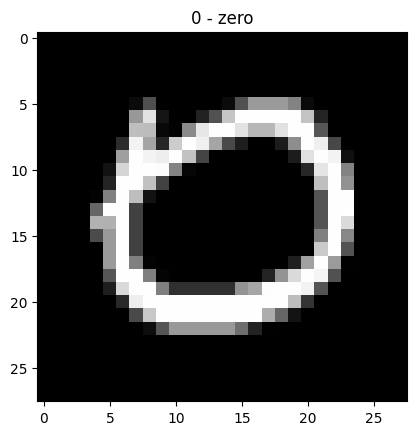

In [10]:
# Plot an image
import random
indx = random.randint(0,len(train_data)-1)
image,label = train_data[indx]
print(f"Image shape: {image.shape}")
plt.title(class_names[label])
plt.imshow(image.squeeze(),cmap='gray')
plt.show()

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image Shape: torch.Size([1, 28, 28])


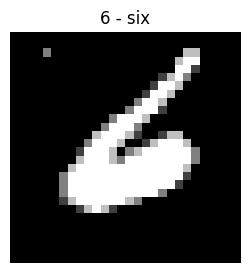

Image Shape: torch.Size([1, 28, 28])


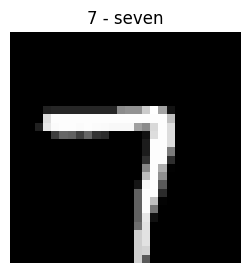

Image Shape: torch.Size([1, 28, 28])


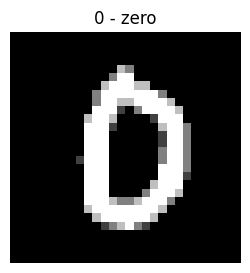

Image Shape: torch.Size([1, 28, 28])


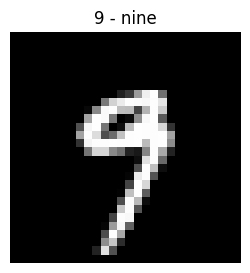

Image Shape: torch.Size([1, 28, 28])


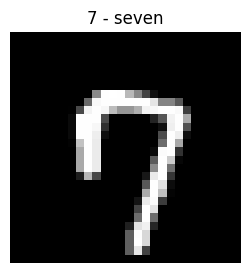

In [11]:
for i in range(5):
    indx=random.randint(0,len(train_data)-1)
    image,label = train_data[indx]
    print(f"Image Shape: {image.shape}")
    plt.figure(figsize=(3,3))
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
    plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1bb8a081ff0>,
 <torch.utils.data.dataloader.DataLoader at 0x1bb8a082950>)

In [13]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
class MNISTModelV0(nn.Module):
    '''
    Model architecture that replicates TinyVGG
    '''
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride= 2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size=3,
                      stride= 1,
                      padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units*7*7,
                      out_features= output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x= self.classifier(x)
        # print(x.shape)
        return x

In [16]:
torch.manual_seed(42)
model_0 = MNISTModelV0(input_shape=1,
                       hidden_units= 10,
                       output_shape= len(class_names)).to(device)
model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
rand_image_tensor = torch.randn(size=(1,28,28)).unsqueeze(0).to(device)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [18]:
model_0(rand_image_tensor.to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [19]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNISTModelV0(input_shape=1,
                         hidden_units = 10,
                         output_shape= 10).to("cpu")

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_cpu.train()
        
        # Put the data on the CPU
        X , y = X.to("cpu"), y.to("cpu")
        #Forward pass
        y_pred = model_cpu(X)
        
        #Loss calculation
        loss= loss_fn(y_pred, y)
        train_loss += loss
        
        # optimizer zero grad
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #Optimizer step
        optimizer.step()
        
    # Average train loss per batch
    train_loss /= len(train_dataloader)
    
    ### Testing loop
    total_test_loss = 0
    #Put model in eval mode
    model_cpu.eval()
    
    #Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test,y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)
            
            total_test_loss += test_loss 
        
        total_test_loss /= len(test_dataloader)
        
    print(f"Epoch: {epoch} | Average train loss: {train_loss:.3f} | Avg test loss: {total_test_loss:.3f}")

C:\Users\Gaurav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 20%|██        | 1/5 [00:58<03:52, 58.19s/it]

Epoch: 0 | Average train loss: 0.421 | Avg test loss: 0.115


 40%|████      | 2/5 [01:54<02:50, 56.96s/it]

Epoch: 1 | Average train loss: 0.080 | Avg test loss: 0.070


 60%|██████    | 3/5 [02:50<01:52, 56.47s/it]

Epoch: 2 | Average train loss: 0.063 | Avg test loss: 0.054


 80%|████████  | 4/5 [03:46<00:56, 56.36s/it]

Epoch: 3 | Average train loss: 0.054 | Avg test loss: 0.049


100%|██████████| 5/5 [04:50<00:00, 58.11s/it]

Epoch: 4 | Average train loss: 0.048 | Avg test loss: 0.042
CPU times: total: 8min 34s
Wall time: 4min 50s


In [20]:
%%time
#Model on GPU
model_gpu = MNISTModelV0(input_shape= 1,
                        hidden_units= 10,
                        output_shape= 10).to("cuda")

# Create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameers(), lr=0.1)

### Training loop 
epochs = 5

for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_gpu.train()

        X,y = X.to("cuda"), y.to("cuda")

        #Forward pass
        y_pred = model_gpu(X)

        #Loss
        loss = loss_fn(y_pred,y)
        train_loss += loss

        #optimizer zero grad
        optimizer.zero_grad()

        #Loss backward
        loss.backward()

        #Optimizer step
        optimizer.step()
    
    # Average train loss per batch
    train_loss /= len(train_dataloader)

    ### Testing loop
    total_test_loss = 0
    # Put the model in eval mode
    model_gpu.eval()
    # with torch inference mode
    with torch.inference_mode():
        for batch, (X_test,y_test) in enumerate(test_dataloader):
            test_pred = model_gpu(X_test)

            #Loss
            test_loss = loss_fn(test_pred, y_test)
            total_test_loss += test_loss

        # Average loss per batch 
        total_test_loss /= len(test_dataloader)
    print(f"Epoch: {epoch} | Average train loss: {train_loss:.3f} | Avg test loss: {total_test_loss:.3f}")

AssertionError: Torch not compiled with CUDA enabled

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

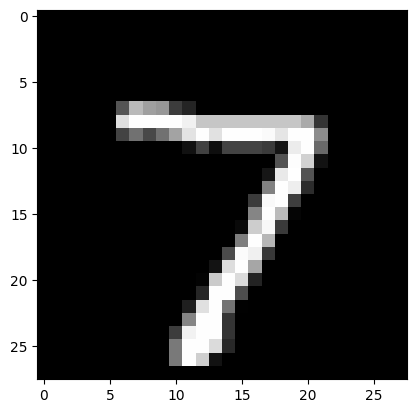

In [26]:
plt.imshow(test_data[0][0].squeeze(0), cmap='gray')

In [29]:
# Logits -> Prediction probabilities -> Predction labels
model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs =  torch.softmax(model_pred_logits, dim=1)
model_pred_labels = torch.argmax(model_pred_probs,dim=1)
model_pred_labels

tensor([7])

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?